<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/6_3_neural_network_basic_concrete_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 학습

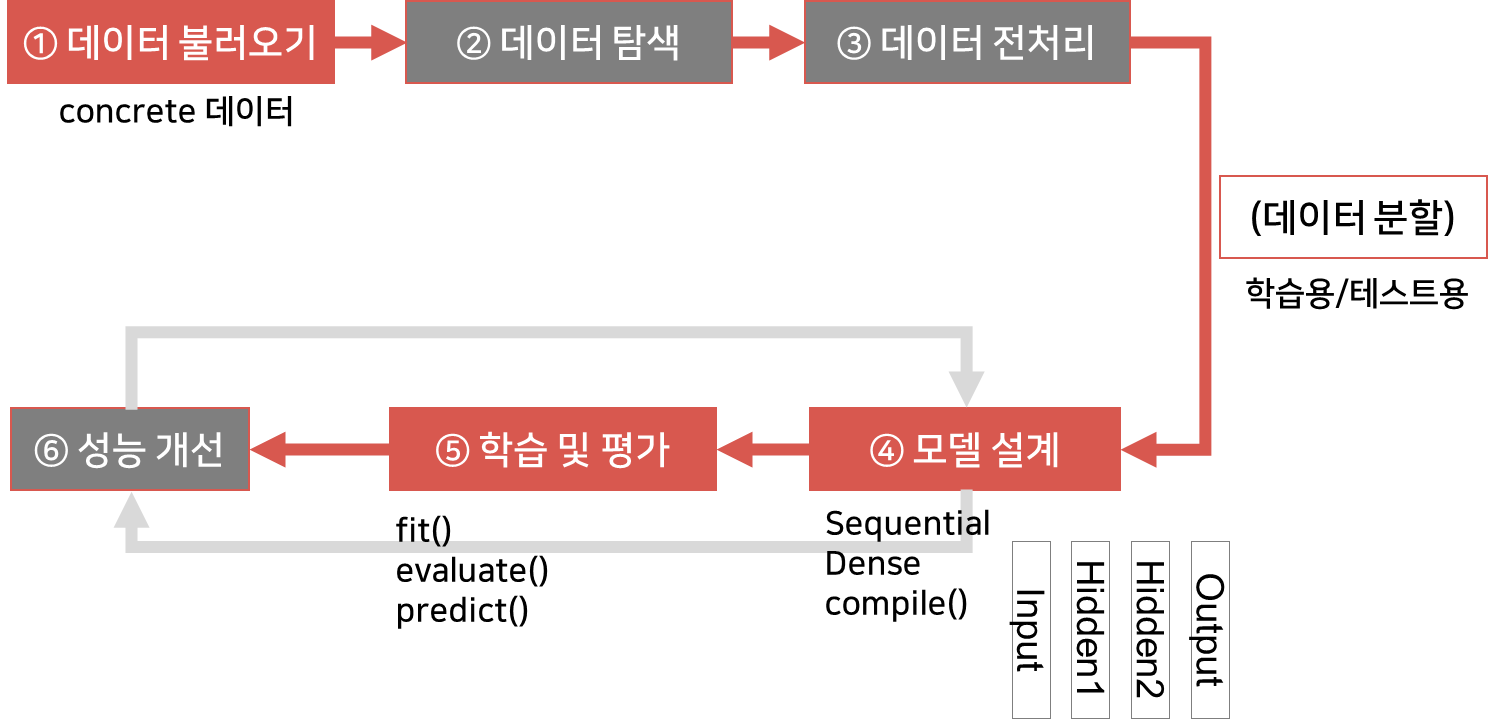

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/concrete.csv')
df.shape

(1030, 9)

In [2]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

# 데이터분할
y = df['CompressiveStrength']
X = df.drop(['CompressiveStrength'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.shape, X_test.shape

((772, 8), (258, 8))

## 모델 설계 및 학습

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mse',
            optimizer='adam',
            metrics=['mse'])

# 모델 실행
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, batch_size=64)

Epoch 1/50
10/10 [==============================] - 0s 7ms/step - loss: 1602.9753 - mse: 1602.9753 - val_loss: 1586.0024 - val_mse: 1586.0024
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1554.1228 - mse: 1554.1228 - val_loss: 1586.0024 - val_mse: 1586.0024
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1553.1239 - mse: 1553.1239 - val_loss: 1581.9595 - val_mse: 1581.9595
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 1543.7163 - mse: 1543.7163 - val_loss: 1575.7018 - val_mse: 1575.7018
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 1540.5160 - mse: 1540.5160 - val_loss: 1576.5471 - val_mse: 1576.5471
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 1535.9873 - mse: 1535.9873 - val_loss: 1576.3914 - val_mse: 1576.3914
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 1531.8746 - mse: 1531.8746 - val_loss: 1572.6613 - val_mse: 1572.6613
Epoch 

<AxesSubplot:>

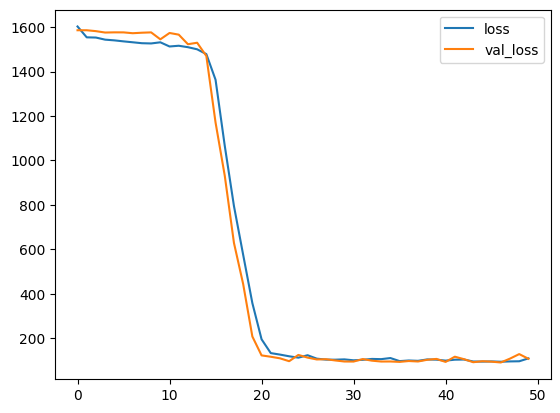

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

## 모델 평가

In [17]:
# 모델 평가
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 500us/step - loss: 97.1472 - mse: 97.1472


[97.14717102050781, 97.14717102050781]

In [18]:
# 값 예측
model.predict(X_test)[0]

9/9 [==============================] - 0s 375us/step


array([58.01014], dtype=float32)

In [19]:
y_test.iloc[0]

52.91